# Supplementary Figures

Inputs:
1. Cluster config

In [115]:
library(ggplot2)
library(matrixStats)
library(reshape2)
library(scales)
library(scattermore)

### Config

In [37]:
cluster_config = read.table("../../figures_factory/configs/cluster.tsv", comment.char = '', sep='\t', header=T)
cluster_config

cluster,colour,description,new_cluster
<int>,<fct>,<fct>,<int>
1,#B03743,Fibroblast,1
2,#E85F6D,Fibroblast-like,3
3,#7C2730,Fibroblast-like,2
4,#F0A118,Intermediate,12
5,#78A824,Pre-iPSC,13
6,#A6D854,Pre-iPSC,14
7,#F01D35,Fibroblast-like,5
8,#13C4A3,iPSC,15
9,#406614,Partially-reprogrammed,10


## Label transfer score histogram

In [2]:
scores = read.table("../../analysis/20200828_RNA_Seurat/sessions/20210725_n59378/atac.20210717_n62599.cluster.transfer.scores.masked.tsv")
head(scores)

# predictions are for old IDs 

,prediction.score.1,prediction.score.2,prediction.score.3,prediction.score.4,prediction.score.5,prediction.score.6,prediction.score.7,prediction.score.8,prediction.score.9,prediction.score.10,prediction.score.11,prediction.score.12,prediction.score.13,prediction.score.14,prediction.score.15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCAAGAGTGACC-1,0.9972545,0,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0
AAACCCAAGTGCCAGA-1,0.9773591,0,0.02014686,0,0,0,0,0,0,0,0,0,0,0,0
AAACCCACACCATTCC-1,0.8187240,0,0.12769239,0,0,0,0,0,0,0,0,0,0,0,0
AAACCCACACGCGTCA-1,0.7412599,0,0.12051715,0,0,0,0,0,0,0,0,0,0,0,0
AAACCCAGTCCATAGT-1,0.7340875,0,0.09453185,0,0,0,0,0,0,0,0,0,0,0,0
AAACCCAGTTATTCTC-1,0.9618709,0,0.02747724,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
dim(scores)

[1] 59378    15

Score for each barcode is the max across all clusters.

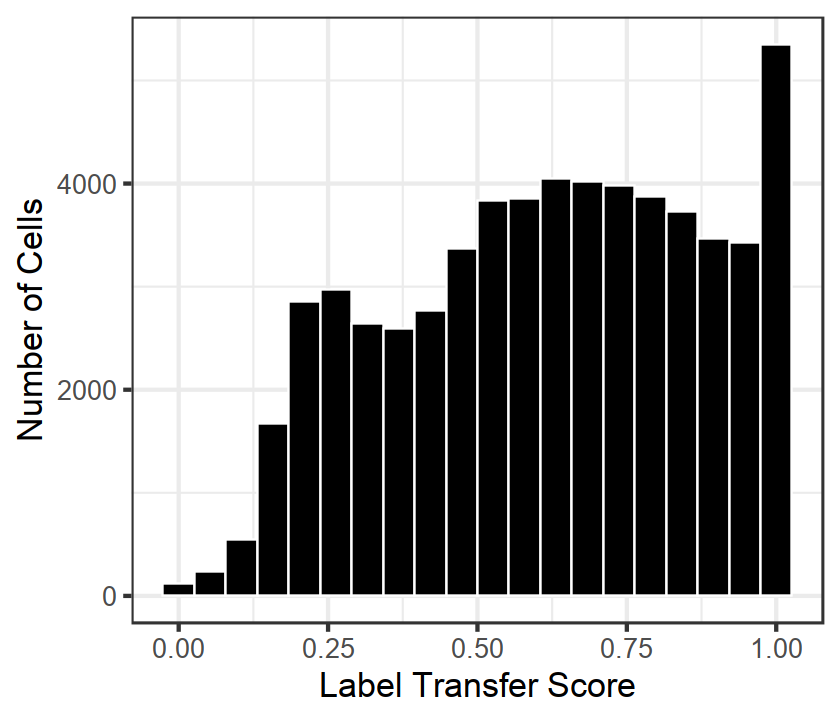

In [33]:
options(repr.plot.width = 7, repr.plot.height = 6)

ltp = ggplot(data.frame(x=rowMaxs(as.matrix(scores)))) +
geom_histogram(aes(x=x), bins=20, color='white', fill='black') +
xlab("Label Transfer Score") +
ylab("Number of Cells") +
theme_bw(base_size=20)

ltp

In [34]:
ggsave(ltp, file="./subfigs/20220103_label_transfer.pdf", height=6, width=7, useDingbats=F)

## Scores correlation matrix

In [44]:
cluster_config

cluster,colour,description,new_cluster
<int>,<fct>,<fct>,<int>
1,#B03743,Fibroblast,1
2,#E85F6D,Fibroblast-like,3
3,#7C2730,Fibroblast-like,2
4,#F0A118,Intermediate,12
5,#78A824,Pre-iPSC,13
6,#A6D854,Pre-iPSC,14
7,#F01D35,Fibroblast-like,5
8,#13C4A3,iPSC,15
9,#406614,Partially-reprogrammed,10


[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [57]:
# switch to new cluster IDs
scores_new_id = scores

stopifnot(all(as.numeric(lapply(strsplit(colnames(scores), "\\."), "[[", 3)) == seq(ncol(scores))))

colnames(scores_new_id) = cluster_config$new_cluster
scores_new_id = scores_new_id[, seq(ncol(scores_new_id))]

head(scores_new_id)

,1,3,2,12,13,14,5,15,10,9,8,4,6,11,7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCCAAGAGTGACC-1,0.9972545,0,0.00000000,0,0,0,0,0,0,0,0,0,0,0,0
AAACCCAAGTGCCAGA-1,0.9773591,0,0.02014686,0,0,0,0,0,0,0,0,0,0,0,0
AAACCCACACCATTCC-1,0.8187240,0,0.12769239,0,0,0,0,0,0,0,0,0,0,0,0
AAACCCACACGCGTCA-1,0.7412599,0,0.12051715,0,0,0,0,0,0,0,0,0,0,0,0
AAACCCAGTCCATAGT-1,0.7340875,0,0.09453185,0,0,0,0,0,0,0,0,0,0,0,0
AAACCCAGTTATTCTC-1,0.9618709,0,0.02747724,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
scores_to_plot = melt(cor(scores_new_id))
scores_to_plot$to_print = (scores_to_plot$value < 1)*(scores_to_plot$value > 0.05)
scores_to_plot$label = ''
scores_to_plot$label[scores_to_plot$to_print==1] = as.character(round(scores_to_plot$value[scores_to_plot$to_print==1], 2))
head(scores_to_plot)

,Var1,Var2,value,to_print,label
,<int>,<int>,<dbl>,<int>,<chr>
1,1,1,1.0000000,0,
2,3,1,-0.1982921,0,
3,2,1,0.3758372,1,0.38
4,12,1,-0.2037350,0,
5,13,1,-0.1767472,0,
6,14,1,-0.1804012,0,


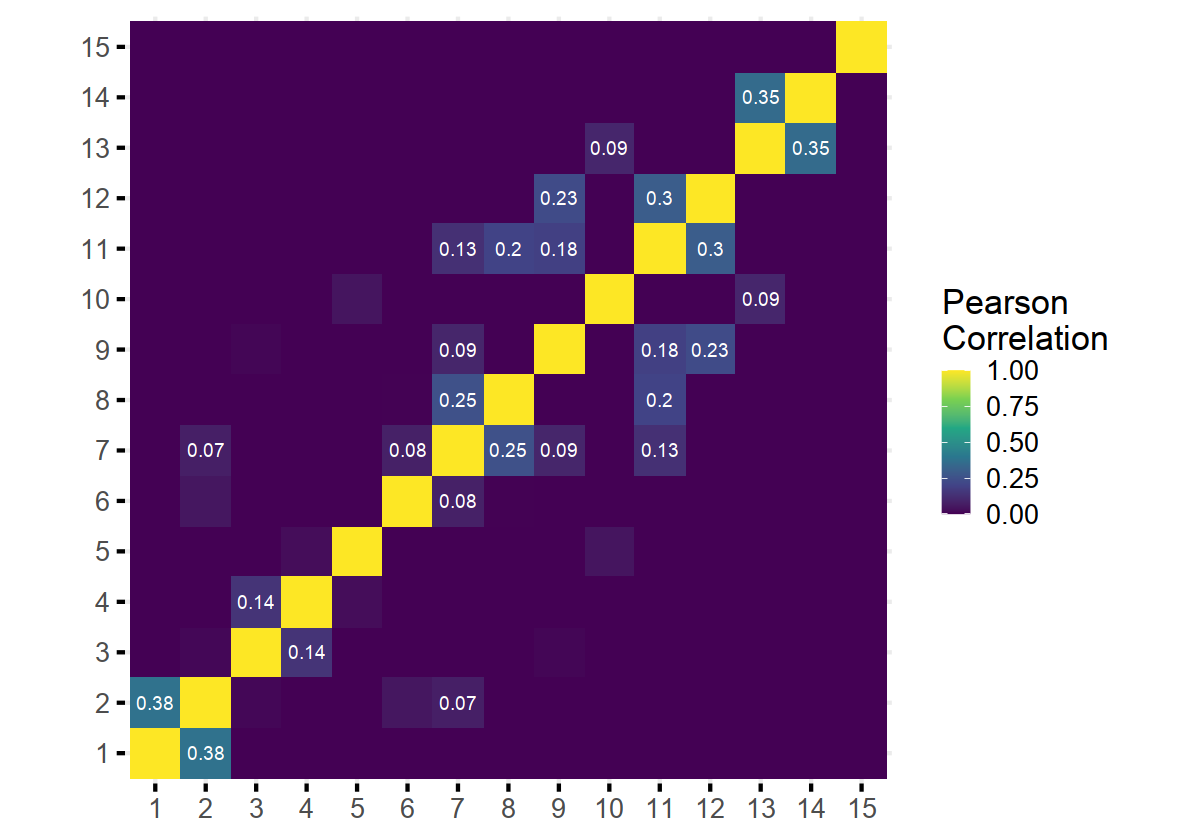

In [112]:
options(repr.plot.width = 10, repr.plot.height = 7)

# these are old cluster IDs (same as MetaData)
corr_plot = ggplot(scores_to_plot) +
geom_tile(aes(x=factor(Var1),y=factor(Var2),fill=value)) +
geom_text(aes(x=factor(Var1),y=factor(Var2),label=label), color='white') +
scale_fill_viridis_c(limits=c(0,1),
                     name="Pearson\nCorrelation",
                    oob=squish) +
theme_minimal(base_size=20) +
theme(#axis.text.x = element_text(angle = 90),
    axis.ticks = element_line(),
     axis.title = element_blank()) +
coord_fixed()

corr_plot

In [113]:
ggsave(corr_plot, file="./subfigs/20220103_label_corr.pdf", height=7, width=10, useDingbats=F)

## CCA

In [116]:
cca = read.table("../../analysis/20200828_RNA_Seurat/sessions/20210725_n59378/atac.20210717_n62599.harmony.cca.metadata.tsv")
dim(cca)
head(cca)

[1] 121977      5

,UMAP_1,UMAP_2,tech,sample,new_cluster
,<dbl>,<dbl>,<fct>,<fct>,<int>
AAACCCAAGAGTGACC-1,1.2965476,-6.107230,rna,D0,1
AAACCCAAGTGCCAGA-1,0.4220583,-6.520695,rna,D0,1
AAACCCACACCATTCC-1,0.5383412,-5.093749,rna,D0,1
AAACCCACACGCGTCA-1,0.6152854,-5.612450,rna,D0,1
AAACCCAGTCCATAGT-1,1.7165230,-4.596422,rna,D0,1
AAACCCAGTTATTCTC-1,-0.5278580,-4.510498,rna,D0,1


In [117]:
plot_df = data.frame(cca)
# shuffle to avoid systematic bias in plotting
plot_df = plot_df[sample(dim(plot_df)[1]), ]

In [137]:
cca_by_tech_umap <- ggplot(plot_df) +
    geom_scattermore(pointsize=6.5, aes(x=UMAP_1 , y=UMAP_2, col=factor(tech)), pixels=c(5000,5000)) +
    # ggtitle("All Cells (Day)") + 
    theme_classic() +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
#           legend.position = "none") +
    coord_fixed()

cca_by_clus_umap <- ggplot(plot_df) +
    geom_scattermore(pointsize=6.5, aes(x=UMAP_1 , y=UMAP_2, col=factor(new_cluster)), pixels=c(5000,5000)) +
    scale_color_manual(values=as.character(cluster_config$colour[order(cluster_config$new_cluster)])) +
    geom_text(data=data.frame(aggregate(plot_df[,c("UMAP_1","UMAP_2")], 
                                        list(plot_df$new_cluster), median)),
             aes(x=UMAP_1, y=UMAP_2, label=Group.1), fontface = "bold", size=7) +
    # ggtitle("All Cells (Day)") + 
    theme_classic() +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          legend.position = "none") +
    coord_fixed()

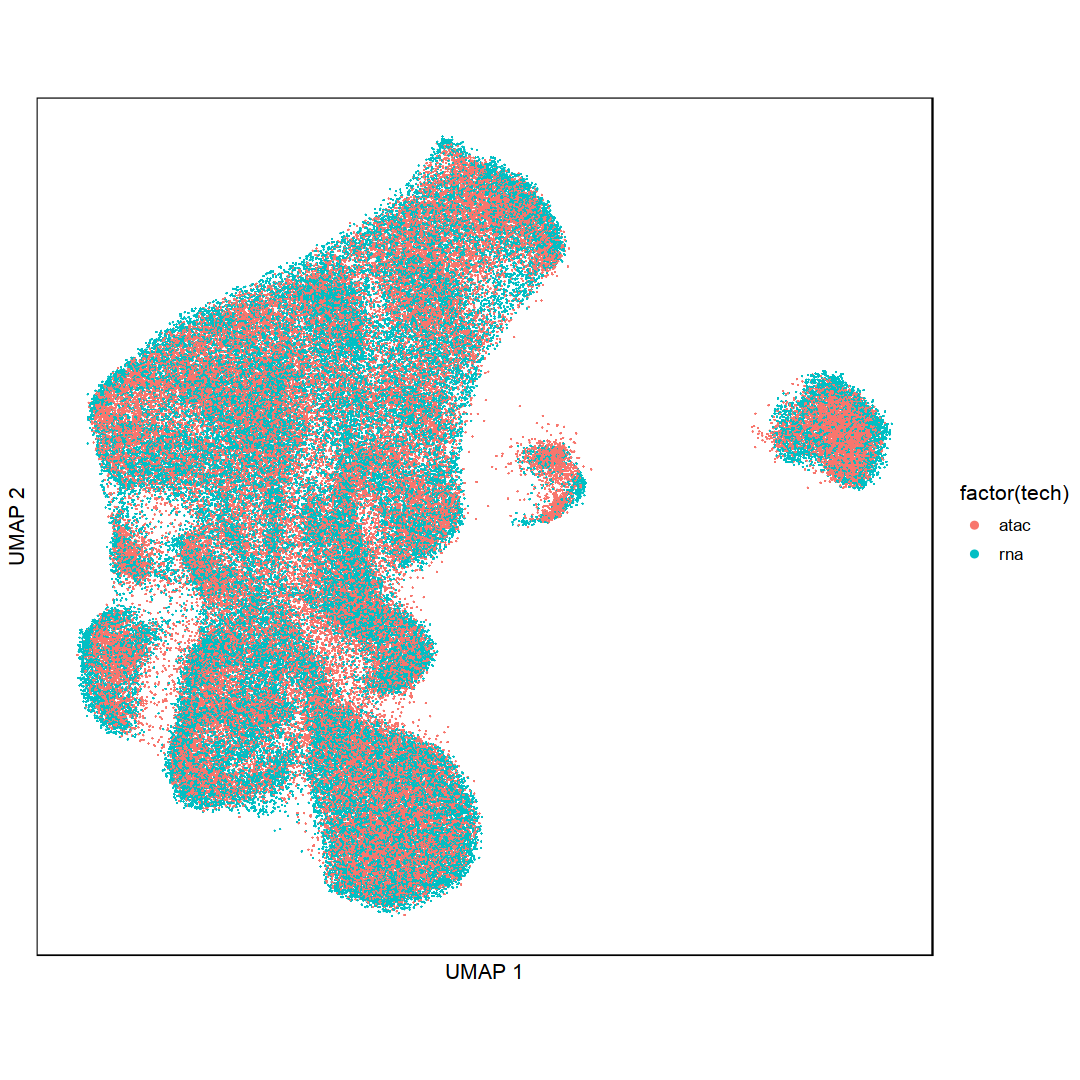

In [138]:
options(repr.plot.width = 9, repr.plot.height = 9)
cca_by_tech_umap

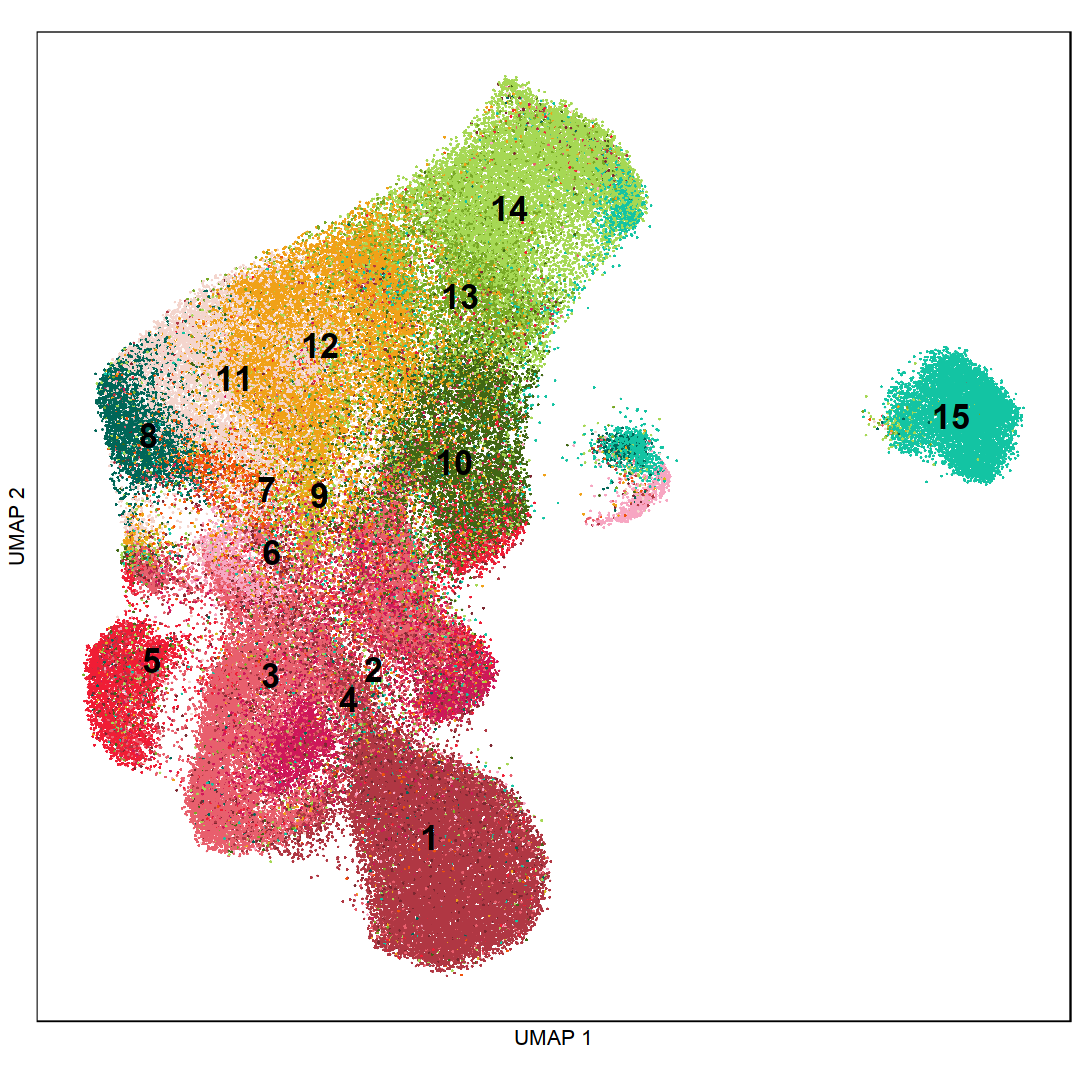

In [136]:
options(repr.plot.width = 9, repr.plot.height = 9)
cca_by_clus_umap

In [141]:
ggsave(sprintf("subfigs/%s_cca_tech_umap.pdf", format(Sys.Date(), "%Y%m%d")),
      cca_by_tech_umap, height=9, width=9)

ggsave(sprintf("subfigs/%s_cca_clusterwise_umap.pdf", format(Sys.Date(), "%Y%m%d")),
      cca_by_clus_umap, height=9, width=9)

---

In [142]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] scattermore_0.7    scales_1.1.0       reshape2_1.4.4     matrixStats_0.56.0
[5] ggplot2_3.3.3     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.5        pillar_1.4.6      compiler_3.6.3    plyr_1.8.6       
 [5] base64enc_0.1-3   tools_3.6.3       digest_0.6.25     uuid_0.1-4      